#  BASE DE DATOS DE ACUERDOS DE PAZ Versión 4 
PEACE AGREEMENTS DATABASE AND DATASET V4

2 descripción corta del documento y de lo que se presenta
La base de datos de acuerdos de paz tiene como finalidad de poder proporcionar un fácil acceso a los documentos que se han desarrollado en los diferentes procesos de paz que han ocurrido en el planeta desde el año 1990 hasta mediados del año 2020, contiene 1868 acuerdos de 140 procesos de paz en donde se pueden conocer más de 225 diferentes tipos de categorías. 
El acceso a la base permite a diferentes partes interesadas en conocer cuáles son los actores de un conflicto en específico para comprender mejor el conflicto, conocer el estado actual e influir en las diferentes propuestas de paz que se están desarrollando.
El desarrollo de esta base de datos fue realizado por el Programa de Investigación de Asentamientos Políticos, de la Universidad de Edimburgo y en la actualidad se encuentra en la versión 4 en donde se puede acceder desde la siguiente pagina web https://www.peaceagreements.org/ 




## Descripción Dataset


2 descripción corta del documento y de lo que se presenta
La base de datos de acuerdos de paz tiene como finalidad de poder proporcionar un fácil acceso a los documentos que se han desarrollado en los diferentes procesos de paz que han ocurrido en el planeta desde el año 1990 hasta mediados del año 2020, contiene 1868 acuerdos de 140 procesos de paz en donde se pueden conocer más de 225 diferentes tipos de categorías. 
El acceso a la base permite a diferentes partes interesadas en conocer cuáles son los actores de un conflicto en específico para comprender mejor el conflicto, conocer el estado actual e influir en las diferentes propuestas de paz que se están desarrollando.
El desarrollo de esta base de datos fue realizado por el Programa de Investigación de Asentamientos Políticos, de la Universidad de Edimburgo y en la actualidad se encuentra en la versión 4 en donde se puede acceder desde la siguiente pagina web https://www.peaceagreements.org/ 

A Continuación, se listan las categorias que componen el dataset:

<b>BASIC INFORMATION:</b>	Infomracion basica del proceso de paz 

<b>GROUPS:</b>	Si el acuerdo contiene información relacionada con niños, derechos del niño, jóvenes, jóvenes o similares

<b>GENDER:</b>	información de dsiposciones que abordan especificamente a mujeres

<b>STATE DEFINITION:</b>	información sobre la definición de estado 

<b>GOVERNANCE:</b>	Porcentaje de sangre que sale del corazón

<b>POWERSHARING:</b>	Información sobre el reparto de poder

<b>HUMAN RIGHTS AND EQUALITY:</b> Información sobre	Derechos humanos e igualdad

<b>JUSTICE SECTOR REFORM:</b>	Información sobre reformas a la justicia

<b>SOCIO-ECONOMIC RECONSTRUCTION:</b>	Información sobre reconstrucción socio-economica

<b>LAND, PROPERTY, AND ENVIRONMENT:</b>	Información sobre  propiedad  y reforma agraria

<b>SECURITY SECTOR:</b>	disposiciones que tratan de las garantías de seguridad 

<b>TRANSITIONAL JUSTICE:</b>	información general a la justicia transicional que sea general

<b>IMPLEMENTATION:</b>	información sobre el acuerdo de paz ha sido firmado por algun funcionario de la ONU.

## Integración y selección de los datos de interés a analizar

Inicialmente se importan las librerias necesarias para la implementación de la practica:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

Se carga el csv al df

In [2]:
file_name='DB_pax_agreements_11-04-21.csv'
df=pd.read_csv(file_name)

Se usa  el metodo head para apreciar los primeros 5 registros cargados en el dataframe:

In [3]:
pd.set_option('max_columns', None)
df.head()

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,Lgt,N_characters,Agtp,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO,Loc1GWNO,Loc2GWNO,UcdpCon,UcdpAgr,PamAgr,CowWar,Interim,GCh,GChRhet,GChAntid,GChSubs,GChOth,GDis,GDisRhet,GDisAntid,GDisSubs,GDisOth,GAge,GAgeRhet,GAgeAntid,GAgeSubs,GAgeOth,GMig,GMigRhet,GMigAntid,GMigSubs,GMigOth,GRa,GRaRhet,GRaAntid,GRaSubs,GRaOth,GRe,GReRhet,GReAntid,GReSubs,GReOth,GInd,GIndRhet,GIndAntid,GIndSubs,GIndOth,GOth,GOthRhet,GOthAntid,GOthSubs,GOthOth,GRef,GRefRhet,GRefSubs,GRefOth,GSoc,GSocRhet,GSocAntid,GSocSubs,GSocOth,GeWom,GeMe,GeMeNu,GeMeOth,GeLgbti,GeLgbtiPos,GeLgbtiNeg,GeFa,StDef,StGen,StCon,StSd,StRef,StSym,StInd,StUni,StBor,StXbor,Pol,PolGen,PolNewInd,PolNewTemp,ConRen,Cons,Ele,ElecComm,PolPar,PolParTrans,PolParOth,Civso,Tral,Pubad,Polps,PpsSt,PpsSub,PpsEx,PpsOro,PpsOthPr,PpsVet,PpsAut,PpsInt,PpsOth,Terps,TpsSub,TpsLoc,TpsAut,TpsOth,Eps,EpsRes,EpsFis,EpsOth,Mps,MpsMe,MpsJt,MpsPro,MpsOth,HrGen,EqGen,HrDem,Prot,ProtCiv,ProtGrp,ProtLgl,ProtOth,HrFra,HrfSp,HrfBor,HrfTinc,HrfOth,HrCp,CprLife,CprTort,CprEq,CprSlav,CprLib,CprDet,CprFmov,CprFspe,CprFass,CprTria,CprPriv,CprVote,CprReli,CprOth,HrSec,SerProp,SerWork,SerHeal,SerEdu,SerStdl,SerShel,SerSs,SerCult,SerOth,HrNi,HrNiMe,HrNiNe,HrNiOth,HrIi,HrIiMon,HrIiBod,HrIiOth,HrMob,HrDet,Med,MedGov,MedSubs,MedLog,MedOth,HrCit,CitGen,CitRights,CitDef,CitOth,JusCr,JusCrSp,JusCrSys,JusCrPow,JusEm,JusJu,JusPri,JusTra,Dev,DevSoc,DevHum,DevInfra,NEC,NatRes,IntFu,Bus,Tax,TaxPo,TaxRef,TaxOth,Ban,CenBan,BanPers,BanInt,BanXb,LaRef,LaRefMan,LaRefRet,LaRefOth,LaNom,LaCH,LaCHTa,LaCHIt,LaCHPro,LaCHOth,LaEn,Wat,SsrGua,Ce,CeProv,CeGen,SsrPol,SsrArm,SsrDdr,DdrDemil,DdrProg,SsrInt,SsrPsf,SsrFf,Cor,SsrCrOcr,SsrDrugs,Terr,TjGen,TjAm,TjAmPro,TjSan,TjPower,TjAmBan,TjCou,TjJaNc,TjJaIc,TjMech,TjPrire,TjVet,TjVic,TjMis,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,Afghanistan,Government/territory,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,3,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,2,5235,Intra,Pre,PreMix,Stated to be Participants to the Afghan Peace ...,Qatar\r\nGerman Government \r\nUnited Nations\...,"Page 2, 8:\r\n8. We acknowledge and approve th...",AFG,NaN,700.0,NaN,333,NaN,NaN,225.0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,2,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,4,10203,Intra,SubPar,MultIss,"President of the IRA Mohammad Ashraf Ghani, ch...",NaN,NaN,AFG,NaN,700.0,NaN,333,1488.0,NaN,851.0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,1
2,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1923,2,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,4,11110,Intra,Imp,ExtSub,Dr. Mohammad Ashraf Ghani Ahmadzai \r\nDr. Abd...,The foregoing signatures were witnessed by:\r\...,"Page 3, D. Creation of the position of leader ...",AFG,NaN,700.0,NaN,333,NaN,NaN,225.0,No,2,1,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Se consulta el tipo de dato de cada atributo que compone el dataframe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Columns: 267 entries, Con to ImSrc
dtypes: float64(5), int64(245), object(17)
memory usage: 3.8+ MB


In [5]:
pd.set_option('display.max_rows', 300)
df.dtypes

Con              object
Contp            object
PP                int64
PPName           object
Reg              object
AgtId             int64
Ver               int64
Agt              object
Dat              object
Status           object
Lgt               int64
N_characters      int64
Agtp             object
Stage            object
StageSub         object
Part             object
ThrdPart         object
OthAgr           object
Loc1ISO          object
Loc2ISO          object
Loc1GWNO        float64
Loc2GWNO        float64
UcdpCon          object
UcdpAgr         float64
PamAgr          float64
CowWar          float64
Interim          object
GCh               int64
GChRhet           int64
GChAntid          int64
GChSubs           int64
GChOth            int64
GDis              int64
GDisRhet          int64
GDisAntid         int64
GDisSubs          int64
GDisOth           int64
GAge              int64
GAgeRhet          int64
GAgeAntid         int64
GAgeSubs          int64
GAgeOth         

Se realiza un <b>resumen</b> del tipo de datos y contienen el dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Columns: 267 entries, Con to ImSrc
dtypes: float64(5), int64(245), object(17)
memory usage: 3.8+ MB


Usamos el método <b>describe</b>  para obtener un resumen estadístico del marco de datos.

In [7]:
df.describe(include='all')

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,Lgt,N_characters,Agtp,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO,Loc1GWNO,Loc2GWNO,UcdpCon,UcdpAgr,PamAgr,CowWar,Interim,GCh,GChRhet,GChAntid,GChSubs,GChOth,GDis,GDisRhet,GDisAntid,GDisSubs,GDisOth,GAge,GAgeRhet,GAgeAntid,GAgeSubs,GAgeOth,GMig,GMigRhet,GMigAntid,GMigSubs,GMigOth,GRa,GRaRhet,GRaAntid,GRaSubs,GRaOth,GRe,GReRhet,GReAntid,GReSubs,GReOth,GInd,GIndRhet,GIndAntid,GIndSubs,GIndOth,GOth,GOthRhet,GOthAntid,GOthSubs,GOthOth,GRef,GRefRhet,GRefSubs,GRefOth,GSoc,GSocRhet,GSocAntid,GSocSubs,GSocOth,GeWom,GeMe,GeMeNu,GeMeOth,GeLgbti,GeLgbtiPos,GeLgbtiNeg,GeFa,StDef,StGen,StCon,StSd,StRef,StSym,StInd,StUni,StBor,StXbor,Pol,PolGen,PolNewInd,PolNewTemp,ConRen,Cons,Ele,ElecComm,PolPar,PolParTrans,PolParOth,Civso,Tral,Pubad,Polps,PpsSt,PpsSub,PpsEx,PpsOro,PpsOthPr,PpsVet,PpsAut,PpsInt,PpsOth,Terps,TpsSub,TpsLoc,TpsAut,TpsOth,Eps,EpsRes,EpsFis,EpsOth,Mps,MpsMe,MpsJt,MpsPro,MpsOth,HrGen,EqGen,HrDem,Prot,ProtCiv,ProtGrp,ProtLgl,ProtOth,HrFra,HrfSp,HrfBor,HrfTinc,HrfOth,HrCp,CprLife,CprTort,CprEq,CprSlav,CprLib,CprDet,CprFmov,CprFspe,CprFass,CprTria,CprPriv,CprVote,CprReli,CprOth,HrSec,SerProp,SerWork,SerHeal,SerEdu,SerStdl,SerShel,SerSs,SerCult,SerOth,HrNi,HrNiMe,HrNiNe,HrNiOth,HrIi,HrIiMon,HrIiBod,HrIiOth,HrMob,HrDet,Med,MedGov,MedSubs,MedLog,MedOth,HrCit,CitGen,CitRights,CitDef,CitOth,JusCr,JusCrSp,JusCrSys,JusCrPow,JusEm,JusJu,JusPri,JusTra,Dev,DevSoc,DevHum,DevInfra,NEC,NatRes,IntFu,Bus,Tax,TaxPo,TaxRef,TaxOth,Ban,CenBan,BanPers,BanInt,BanXb,LaRef,LaRefMan,LaRefRet,LaRefOth,LaNom,LaCH,LaCHTa,LaCHIt,LaCHPro,LaCHOth,LaEn,Wat,SsrGua,Ce,CeProv,CeGen,SsrPol,SsrArm,SsrDdr,DdrDemil,DdrProg,SsrInt,SsrPsf,SsrFf,Cor,SsrCrOcr,SsrDrugs,Terr,TjGen,TjAm,TjAmPro,TjSan,TjPower,TjAmBan,TjCou,TjJaNc,TjJaIc,TjMech,TjPrire,TjVet,TjVic,TjMis,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
count,1868,1868,1868.000000,1868,1868,1868.000000,1868.000000,1868,1868,1868,1868.000000,1868.000000,1868,1868,1843,1852,976,976,1833,246,1857.000000,246.000000,1713,2.970000e+02,33.000000,1115.000000,1868,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.0,1868.000000,1868.000000,1868.000000,1868.000000,1868.0,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.00000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.0,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,186

In [8]:
df.shape

(1868, 267)

## Datos Faltantes

Usando la función isnull en la salida evaluando el dataframe completo nos entrega un valor booleano que indica si el valor que se pasa al argumento es, de hecho, datos faltantes.

"True" significa valor perdido, mientras que "False" significa valor no perdido.

In [9]:

missing_data = df.isnull()
missing_data.head(5)

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,Lgt,N_characters,Agtp,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO,Loc1GWNO,Loc2GWNO,UcdpCon,UcdpAgr,PamAgr,CowWar,Interim,GCh,GChRhet,GChAntid,GChSubs,GChOth,GDis,GDisRhet,GDisAntid,GDisSubs,GDisOth,GAge,GAgeRhet,GAgeAntid,GAgeSubs,GAgeOth,GMig,GMigRhet,GMigAntid,GMigSubs,GMigOth,GRa,GRaRhet,GRaAntid,GRaSubs,GRaOth,GRe,GReRhet,GReAntid,GReSubs,GReOth,GInd,GIndRhet,GIndAntid,GIndSubs,GIndOth,GOth,GOthRhet,GOthAntid,GOthSubs,GOthOth,GRef,GRefRhet,GRefSubs,GRefOth,GSoc,GSocRhet,GSocAntid,GSocSubs,GSocOth,GeWom,GeMe,GeMeNu,GeMeOth,GeLgbti,GeLgbtiPos,GeLgbtiNeg,GeFa,StDef,StGen,StCon,StSd,StRef,StSym,StInd,StUni,StBor,StXbor,Pol,PolGen,PolNewInd,PolNewTemp,ConRen,Cons,Ele,ElecComm,PolPar,PolParTrans,PolParOth,Civso,Tral,Pubad,Polps,PpsSt,PpsSub,PpsEx,PpsOro,PpsOthPr,PpsVet,PpsAut,PpsInt,PpsOth,Terps,TpsSub,TpsLoc,TpsAut,TpsOth,Eps,EpsRes,EpsFis,EpsOth,Mps,MpsMe,MpsJt,MpsPro,MpsOth,HrGen,EqGen,HrDem,Prot,ProtCiv,ProtGrp,ProtLgl,ProtOth,HrFra,HrfSp,HrfBor,HrfTinc,HrfOth,HrCp,CprLife,CprTort,CprEq,CprSlav,CprLib,CprDet,CprFmov,CprFspe,CprFass,CprTria,CprPriv,CprVote,CprReli,CprOth,HrSec,SerProp,SerWork,SerHeal,SerEdu,SerStdl,SerShel,SerSs,SerCult,SerOth,HrNi,HrNiMe,HrNiNe,HrNiOth,HrIi,HrIiMon,HrIiBod,HrIiOth,HrMob,HrDet,Med,MedGov,MedSubs,MedLog,MedOth,HrCit,CitGen,CitRights,CitDef,CitOth,JusCr,JusCrSp,JusCrSys,JusCrPow,JusEm,JusJu,JusPri,JusTra,Dev,DevSoc,DevHum,DevInfra,NEC,NatRes,IntFu,Bus,Tax,TaxPo,TaxRef,TaxOth,Ban,CenBan,BanPers,BanInt,BanXb,LaRef,LaRefMan,LaRefRet,LaRefOth,LaNom,LaCH,LaCHTa,LaCHIt,LaCHPro,LaCHOth,LaEn,Wat,SsrGua,Ce,CeProv,CeGen,SsrPol,SsrArm,SsrDdr,DdrDemil,DdrProg,SsrInt,SsrPsf,SsrFf,Cor,SsrCrOcr,SsrDrugs,Terr,TjGen,TjAm,TjAmPro,TjSan,TjPower,TjAmBan,TjCou,TjJaNc,TjJaIc,TjMech,TjPrire,TjVet,TjVic,TjMis,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

Usando un bucle se puede  calcular rápidamente el número de valores faltantes en cada columna. Como se mencionó anteriormente, "True" representa un valor faltante, "False" significa que el valor está presente en el conjunto de datos. En el cuerpo del bucle for, el método ".value_counts ()" cuenta el número de valores "True".

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Con
False    1868
Name: Con, dtype: int64

Contp
False    1868
Name: Contp, dtype: int64

PP
False    1868
Name: PP, dtype: int64

PPName
False    1868
Name: PPName, dtype: int64

Reg
False    1868
Name: Reg, dtype: int64

AgtId
False    1868
Name: AgtId, dtype: int64

Ver
False    1868
Name: Ver, dtype: int64

Agt
False    1868
Name: Agt, dtype: int64

Dat
False    1868
Name: Dat, dtype: int64

Status
False    1868
Name: Status, dtype: int64

Lgt
False    1868
Name: Lgt, dtype: int64

N_characters
False    1868
Name: N_characters, dtype: int64

Agtp
False    1868
Name: Agtp, dtype: int64

Stage
False    1868
Name: Stage, dtype: int64

StageSub
False    1843
True       25
Name: StageSub, dtype: int64

Part
False    1852
True       16
Name: Part, dtype: int64

ThrdPart
False    976
True     892
Name: ThrdPart, dtype: int64

OthAgr
False    976
True     892
Name: OthAgr, dtype: int64

Loc1ISO
False    1833
True       35
Name: Loc1ISO, dtype: int64

Loc2ISO
True     1622
False     246
Nam

Name: Terr, dtype: int64

TjGen
False    1868
Name: TjGen, dtype: int64

TjAm
False    1868
Name: TjAm, dtype: int64

TjAmPro
False    1868
Name: TjAmPro, dtype: int64

TjSan
False    1868
Name: TjSan, dtype: int64

TjPower
False    1868
Name: TjPower, dtype: int64

TjAmBan
False    1868
Name: TjAmBan, dtype: int64

TjCou
False    1868
Name: TjCou, dtype: int64

TjJaNc
False    1868
Name: TjJaNc, dtype: int64

TjJaIc
False    1868
Name: TjJaIc, dtype: int64

TjMech
False    1868
Name: TjMech, dtype: int64

TjPrire
False    1868
Name: TjPrire, dtype: int64

TjVet
False    1868
Name: TjVet, dtype: int64

TjVic
False    1868
Name: TjVic, dtype: int64

TjMis
False    1868
Name: TjMis, dtype: int64

TjRep
False    1868
Name: TjRep, dtype: int64

TjRSym
False    1868
Name: TjRSym, dtype: int64

TjRMa
False    1868
Name: TjRMa, dtype: int64

TjNR
False    1868
Name: TjNR, dtype: int64

ImUN
False    1868
Name: ImUN, dtype: int64

ImOth
False    1868
Name: ImOth, dtype: int64

ImRef
False    1

después de tener una idea sobre los tipos en nuestro conjunto de datos, necesitamos verificar los valores faltantes. una forma es usar un <b>mapa de calor</b> junto con isna ()

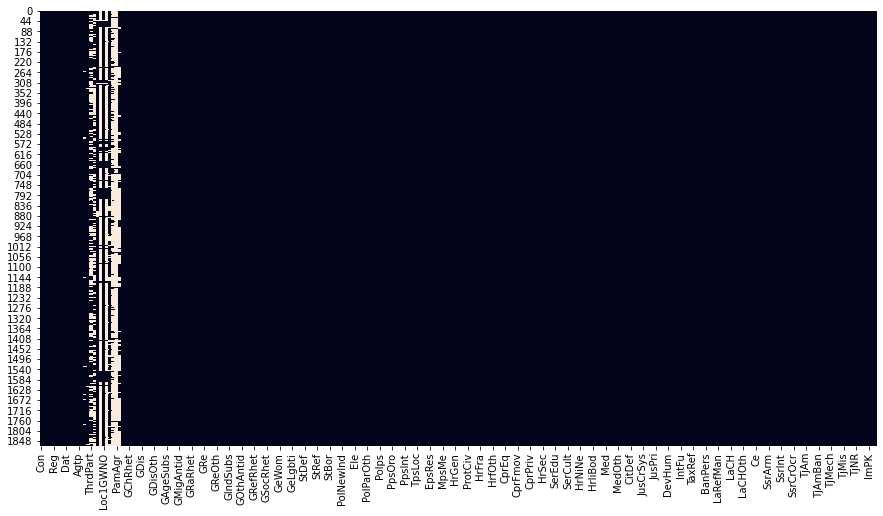

In [11]:
# se visualiza el resultado anterior
ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df.isna(), cbar=False);

Para confirmar el resultado se realiza una lista todas las variables

In [12]:
((df.shape[0]-df.isna().sum())/df.shape[0])*100

Con             100.000000
Contp           100.000000
PP              100.000000
PPName          100.000000
Reg             100.000000
AgtId           100.000000
Ver             100.000000
Agt             100.000000
Dat             100.000000
Status          100.000000
Lgt             100.000000
N_characters    100.000000
Agtp            100.000000
Stage           100.000000
StageSub         98.661670
Part             99.143469
ThrdPart         52.248394
OthAgr           52.248394
Loc1ISO          98.126338
Loc2ISO          13.169165
Loc1GWNO         99.411135
Loc2GWNO         13.169165
UcdpCon          91.702355
UcdpAgr          15.899358
PamAgr            1.766595
CowWar           59.689507
Interim         100.000000
GCh             100.000000
GChRhet         100.000000
GChAntid        100.000000
GChSubs         100.000000
GChOth          100.000000
GDis            100.000000
GDisRhet        100.000000
GDisAntid       100.000000
GDisSubs        100.000000
GDisOth         100.000000
G

Se identifica como variables con datos faltantes
StageSub         98.661670
Part             99.143469
ThrdPart         52.248394
OthAgr           52.248394
Loc1ISO          98.126338
Loc2ISO          13.169165
Loc1GWNO         99.411135
Loc2GWNO         13.169165
UcdpCon          91.702355
UcdpAgr          15.899358
PamAgr            1.766595
CowWar           59.689507

Se consulta el diccionarion de codigos para identificar la posible falla de datos en la siguiente direccion
https://www.peaceagreements.org/files/PA-X%20codebook%20Version4.pdf


Se consulta el atributo “PamAgr” En el diccionario de datos para determinar que representa arrojando la siguiente información: 
“Es posible que este campo esté vacío, esto sucede en casos de acuerdos que no forman parte de los datos PAM”
Se evalúa el 2 atributo con menor porcentaje en diccionario de datos arrojando la siguiente información:

“Solo se usa en casos de conflicto interestatal, indicando una de las ubicaciones principales de conflicto interestatal y devolviendo la designación de país ISO.”

Según los resultados obtenidos de las dos variables consultadas se considera <b>que no son datos faltantes</b> ya que se tiene justificación de por qué se encuentra vacío.



## Identificación de valores extremos

Se utilizan las varaibles númericas 'PP','AgtId','Lgt','N_characters','Loc1GWNO','Loc2GWNO','UcdpAgr','PamAgr','CowWar'
para realizar el análisis de los valores extremos.

<AxesSubplot:>

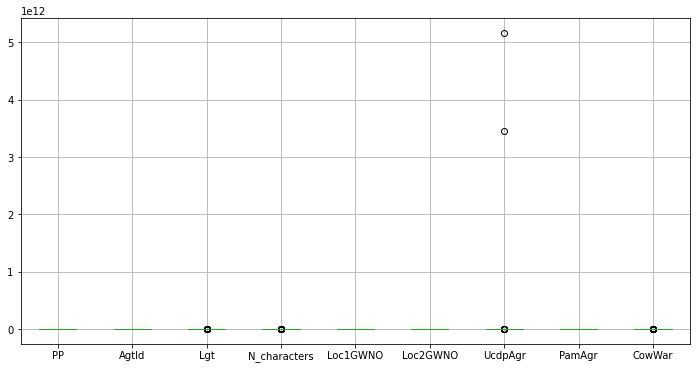

In [13]:
features = ['PP','AgtId','Lgt','N_characters','Loc1GWNO','Loc2GWNO','UcdpAgr','PamAgr','CowWar']
df[features].boxplot(return_type='axes',figsize = ( 12,  6 ))

Se analizan de manera independiente cada una de las variables a través de un <b>diagrama de cajas</b>.  

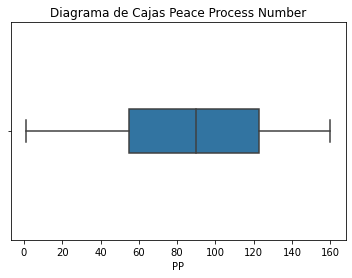

In [14]:
sns.boxplot(x=df.PP, width= 0.2).set(title='Diagrama de Cajas Peace Process Number');

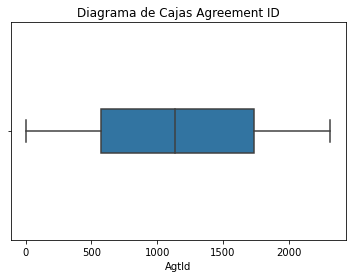

In [15]:
sns.boxplot(x=df.AgtId, width= 0.2 ).set(title='Diagrama de Cajas Agreement ID');

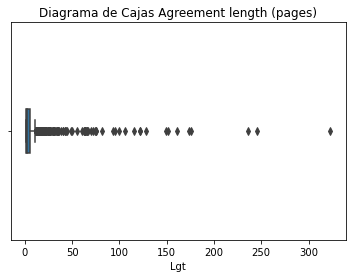

In [16]:
sns.boxplot(x=df.Lgt, width= 0.2).set(title='Diagrama de Cajas Agreement length (pages)');

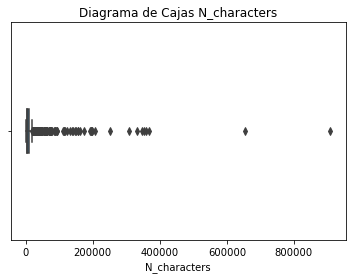

In [17]:
sns.boxplot(x=df.N_characters, width= 0.2).set(title='Diagrama de Cajas N_characters');

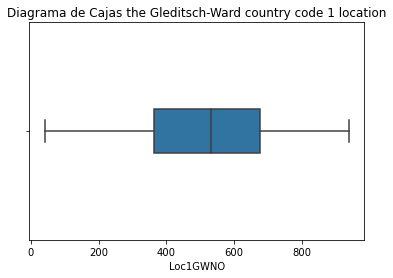

In [18]:
sns.boxplot(x=df.Loc1GWNO, width= 0.2).set(title='Diagrama de Cajas the Gleditsch-Ward country code 1 location');

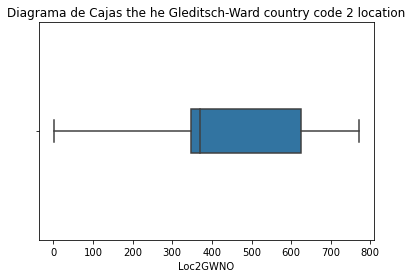

In [19]:

sns.boxplot(x=df.Loc2GWNO, width= 0.2).set(title='Diagrama de Cajas the he Gleditsch-Ward country code 2 location');

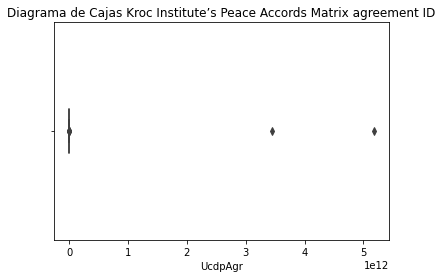

In [20]:


sns.boxplot(x=df.UcdpAgr, width= 0.2).set(title='Diagrama de Cajas Kroc Institute’s Peace Accords Matrix agreement ID');

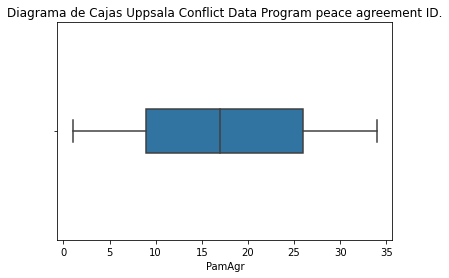

In [21]:
sns.boxplot(x=df.PamAgr, width= 0.2).set(title='Diagrama de Cajas Uppsala Conflict Data Program peace agreement ID.');

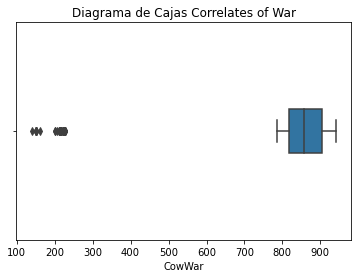

In [22]:
sns.boxplot(x=df.CowWar, width= 0.2).set(title='Diagrama de Cajas Correlates of War');

Las variables que presentan <b>valores extremos son: 'Lgt','N_characters', 'UcdpAgr'y 'CowWar'</b> 



## Análisis variables categóricas

Se realiza la visualización de algunas variables categoricas como son:<b>'Reg', 'Status', 'Con', 'Contp', 'Stage', 'StageSub', 'PPName'y 'Agtp'</b> en donde se evalua la <b>frecuencia y el porcentaje</b> de cada una. 

In [23]:
# se realiza una seleccion de los atributos a analizar  
cat_col = ['Reg', 'Status', 'Con', 'Contp', 'Stage', 'StageSub', 'PPName', 'Agtp']

 <b>Región</b>
 

In [24]:
# se realiza un conteo de cada categoria de la variable
pd.value_counts(df['Reg'])

Africa (excl MENA)              584
Europe and Eurasia              411
Asia and Pacific                377
Middle East and North Africa    263
Americas                        195
Cross-regional                   38
Name: Reg, dtype: int64

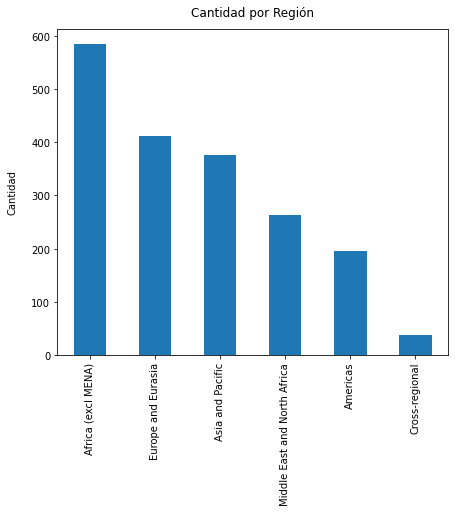

In [25]:
# se realiza una grafica dcada categoria de la variable

df['Reg'].value_counts(). plot ( kind = 'bar' ,  figsize = ( 7 ,  6 ))    

plt . ylabel ( "Cantidad" ,  labelpad = 14 ) 
plt . title ( "Cantidad por Región" ,  y = 1.02 );

    

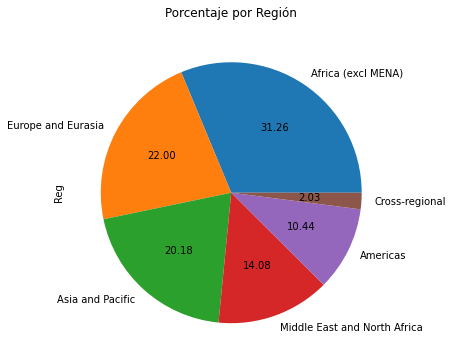

In [26]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
plot = df['Reg'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6) )
plt . title ( "Porcentaje por Región" ,  y = 1.02 );



 <b>Status</b>

In [27]:
# se realiza un conteo de cada categoria de la variable

pd.value_counts(df['Status'])


Multiparty signed/agreed            1725
Unilateral document                  125
Status unclear                        10
Agreement with subsequent status       8
Name: Status, dtype: int64

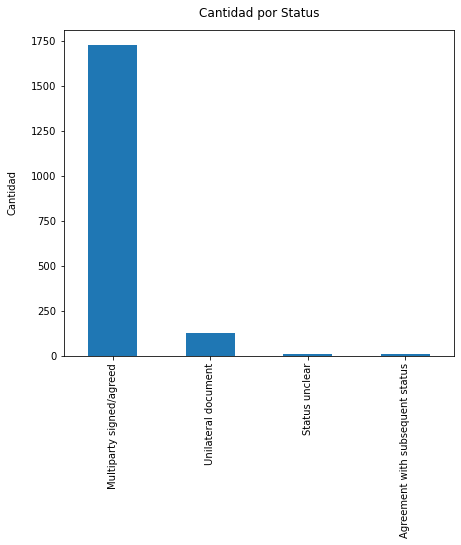

In [28]:
# se realiza una grafica dcada categoria de la variable

df['Status'].value_counts(). plot ( kind = 'bar' ,  figsize = ( 7 ,  6 ))    

plt . ylabel ( "Cantidad" ,  labelpad = 14 ) 
plt . title ( "Cantidad por Status" ,  y = 1.02 );

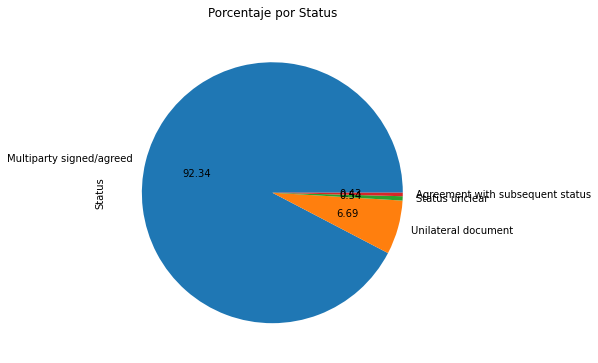

In [29]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
plot = df['Status'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6) )
plt . title ( "Porcentaje por Status" ,  y = 1.02 );


 <b>Country/Entity</b>

In [30]:
# se realiza un conteo de cada categoria de la variable

pd.value_counts(df['Con'])

Bosnia and Herzegovina/Yugoslavia (former)                                                                                                                             133
Colombia                                                                                                                                                               128
Philippines/Mindanao                                                                                                                                                   126
Syria                                                                                                                                                                   93
South Sudan                                                                                                                                                             51
Nepal                                                                                                                                            

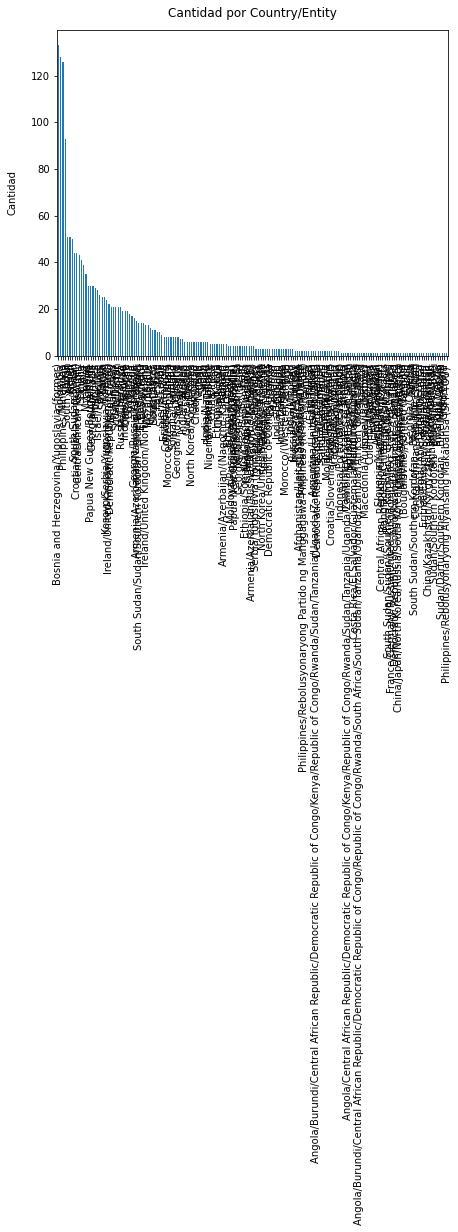

In [31]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
df['Con'].value_counts(). plot ( kind = 'bar' ,  figsize = ( 7 ,  6 ))    


plt . ylabel ( "Cantidad" ,  labelpad = 14 ) 
plt . title ( "Cantidad por Country/Entity" ,  y = 1.02 );

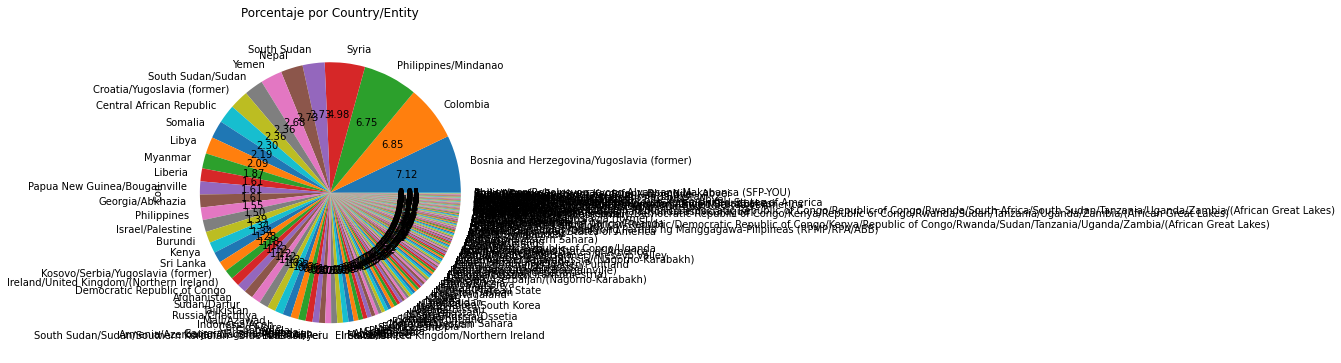

In [32]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
plot = df['Con'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6) )
plt . title ( "Porcentaje por Country/Entity" ,  y = 1.02 );


 <b>Conflict type</b>

In [33]:
# se realiza un conteo de cada categoria de la variable
pd.value_counts(df['Contp'])

Government/territory    843
Government              653
Inter-group             261
Territory               109
Other                     2
Name: Contp, dtype: int64

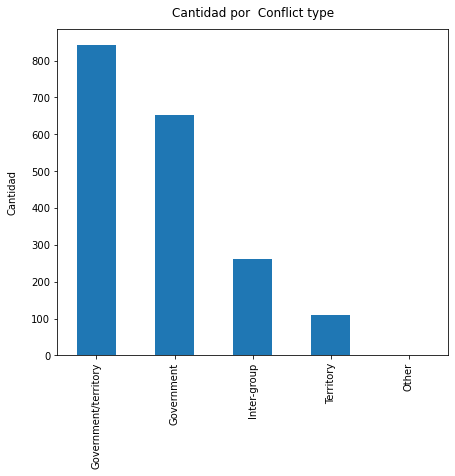

In [34]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
df['Contp'].value_counts(). plot ( kind = 'bar' ,  figsize = ( 7 ,  6 ))    

plt . ylabel ( "Cantidad" ,  labelpad = 14 ) 
plt . title ( "Cantidad por  Conflict type" ,  y = 1.02 );

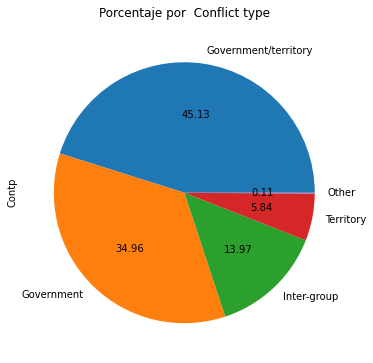

In [35]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
plot = df['Contp'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6) )
plt . title ( "Porcentaje por  Conflict type" ,  y = 1.02 );


 <b>Agreement stage</b>

In [36]:
# se realiza un conteo de cada categoria de la variable
pd.value_counts(df['Stage'])

Pre        513
SubPar     475
Cea        388
Imp        335
SubComp    113
Ren         43
Oth          1
Name: Stage, dtype: int64

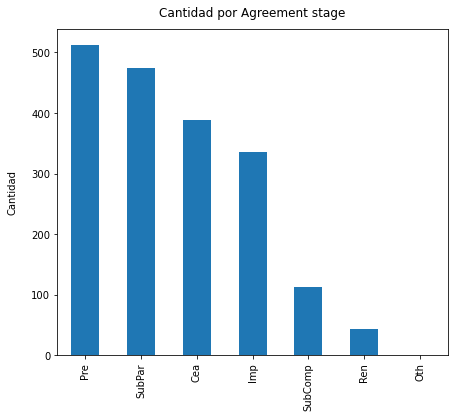

In [37]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
df['Stage'].value_counts(). plot ( kind = 'bar' ,  figsize = ( 7 ,  6 ))    


plt . ylabel ( "Cantidad" ,  labelpad = 14 ) 
plt . title ( "Cantidad por Agreement stage" ,  y = 1.02 );

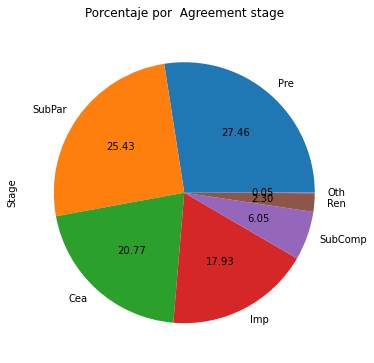

In [38]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
plot = df['Stage'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6) )
plt . title ( "Porcentaje por  Agreement stage" ,  y = 1.02 );


 <b>subcoding of stage</b>

In [39]:
# se realiza un conteo de cada categoria de la variable
pd.value_counts(df['StageSub'])

MultIss     265
Ceas        214
Iss         192
ImpMod      188
Proc        168
Rel         130
Prin        115
ExtSub      110
FrAg         92
PreMix       90
Conf         88
PreOth       45
CeaMix       44
Repre        18
FrCons       18
ExtPar       16
Reimp        16
FrparOth     13
ImpOth       13
Resub         7
Reoth         1
Name: StageSub, dtype: int64

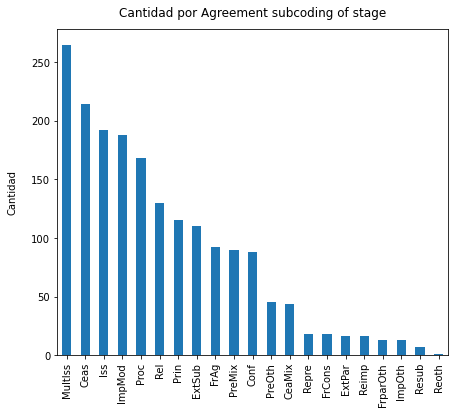

In [40]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
df['StageSub'].value_counts(). plot ( kind = 'bar' ,  figsize = ( 7 ,  6 ))    


plt . ylabel ( "Cantidad" ,  labelpad = 14 ) 
plt . title ( "Cantidad por Agreement subcoding of stage" ,  y = 1.02 );

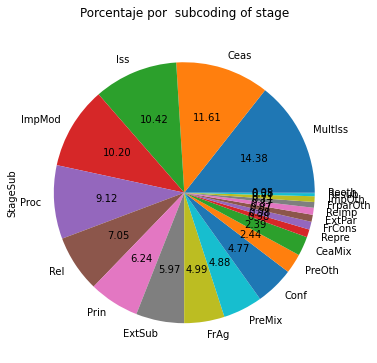

In [41]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
plot = df['StageSub'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6) )
plt . title ( "Porcentaje por  subcoding of stage" ,  y = 1.02 );



 <b>Peace process Name</b>


In [42]:
# se realiza un conteo de cada categoria de la variable
pd.value_counts(df['PPName'])

Bosnia peace process                                     124
Philippines - Mindanao process                           124
Syrian Local Agreements                                   65
Abkhazia peace process                                    51
Colombia III - Arango                                     45
Somalia Peace Process                                     42
Croatia negotiation process                               41
Colombia I - Gaviria                                      38
Northern Ireland peace process                            35
Bougainville: peace process                               35
Myanmar ceasefires process with ethnic armed groups       35
Israel-Palestine peace process                            33
Sudanese (North-South) peace process                      31
Liberia peace process                                     30
Nepal peace process                                       30
Yemen peace process                                       28
Colombia V - Santos     

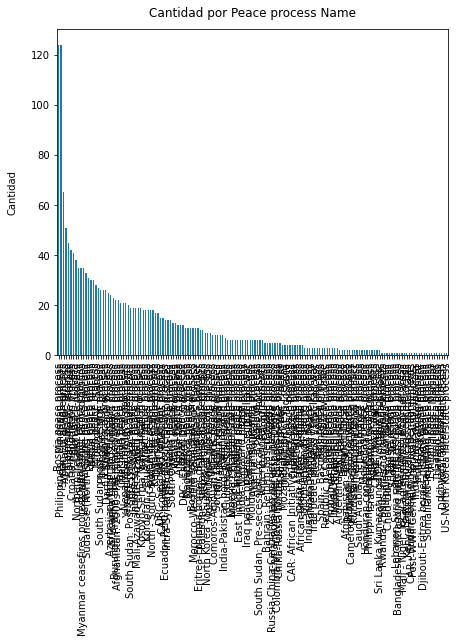

In [43]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
df['PPName'].value_counts(). plot ( kind = 'bar' ,  figsize = ( 7 ,  6 ))    


plt . ylabel ( "Cantidad" ,  labelpad = 14 ) 
plt . title ( "Cantidad por Peace process Name" ,  y = 1.02 );

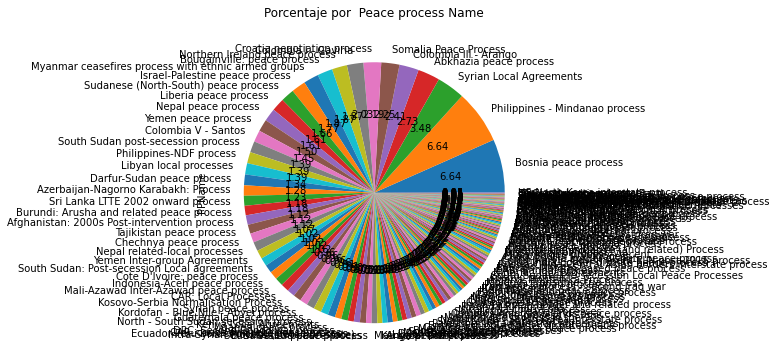

In [44]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
plot = df['PPName'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6) )
plt . title ( "Porcentaje por  Peace process Name" ,  y = 1.02 );



 <b>Agreement/conflict type</b>

In [45]:
# se realiza un conteo de cada categoria de la variable

pd.value_counts(df['Agtp'])

Intra         1270
IntraLocal     286
InterIntra     240
Inter           72
Name: Agtp, dtype: int64

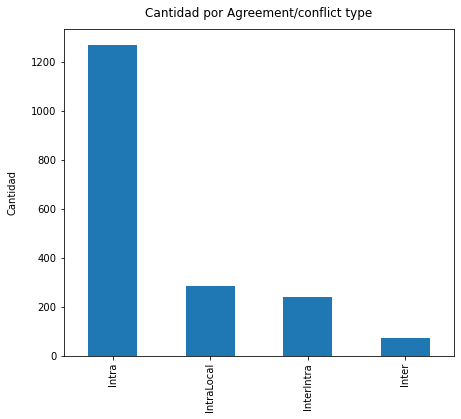

In [46]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
df['Agtp'].value_counts(). plot ( kind = 'bar' ,  figsize = ( 7 ,  6 ))    


plt . ylabel ( "Cantidad" ,  labelpad = 14 ) 
plt . title ( "Cantidad por Agreement/conflict type" ,  y = 1.02 );

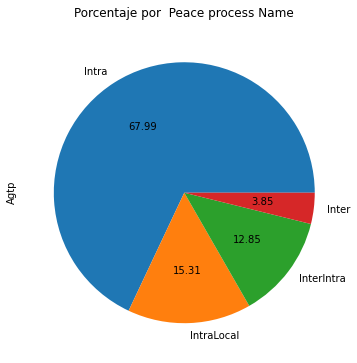

In [47]:
#Se realiza una grafica para visualizar el porcentaje de cada categoria de la variable
plot = df['Agtp'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6) )
plt . title ( "Porcentaje por  Peace process Name" ,  y = 1.02 );

## Analisis variables Numéricas

Se realiza la visualización de algunas variables númericas como son:<b>'GCh','Pol','PolGen','SsrArm','TjGen','ImPK','PP','ImUN'</b> en donde se evalua la <b>el histograma  y el porcentaje</b> de cada una. 

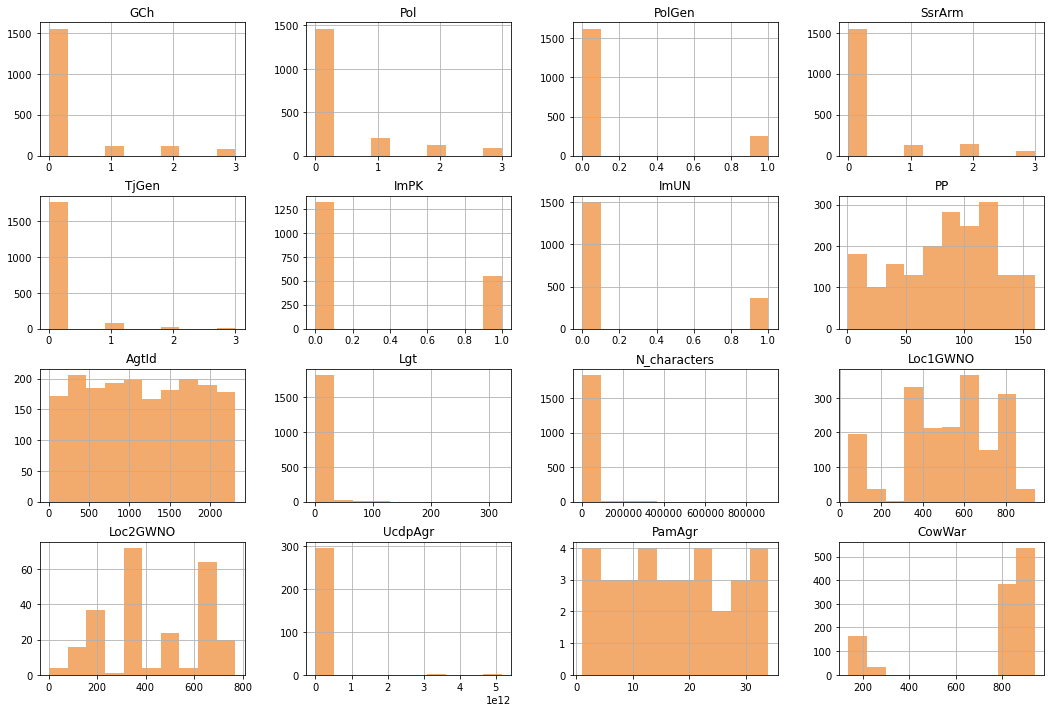

In [48]:
df[['GCh','Pol','PolGen','SsrArm','TjGen','ImPK','ImUN','PP','AgtId','Lgt','N_characters','Loc1GWNO','Loc2GWNO','UcdpAgr','PamAgr','CowWar']].hist(color='#F2AB6D', rwidth=1,figsize=(18, 12));

### Se analizará de manera independiente la variable 'PP'  'TjGen' y 'UcdpAgr'

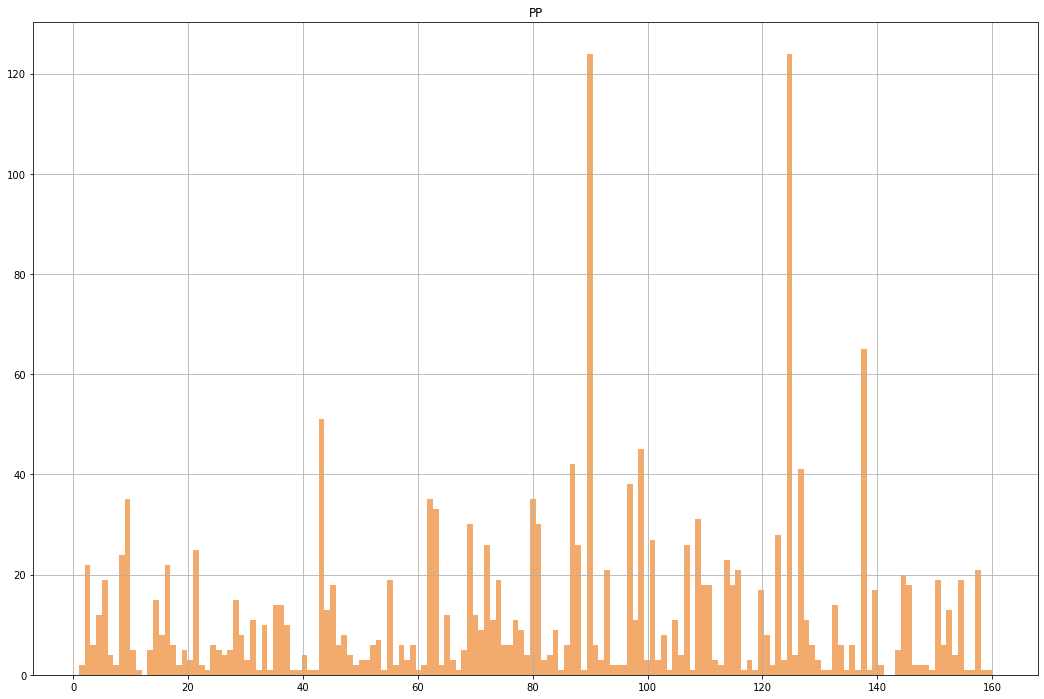

In [49]:
#Generacion de Histograma de PP
df[['PP']].hist(color='#F2AB6D', bins=160, rwidth=1,figsize=(18, 12));

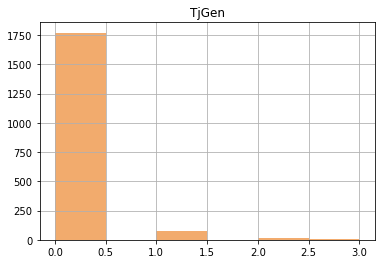

In [50]:
# Generación del histograma de TjGen
df[['TjGen']].hist(color='#F2AB6D', bins=6, rwidth=1,figsize=(6, 4));

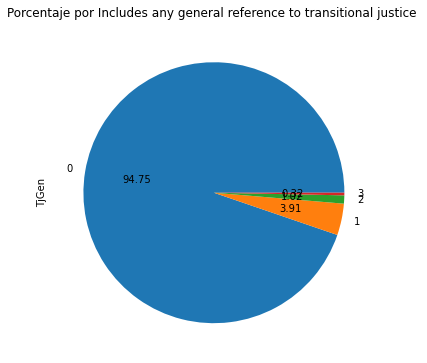

In [51]:
#Se realiza una grafica para visualizar el porcentaje de la variable
plot = df['TjGen'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6) )
plt . title ( "Porcentaje por Includes any general reference to transitional justice " ,  y = 1.02 );

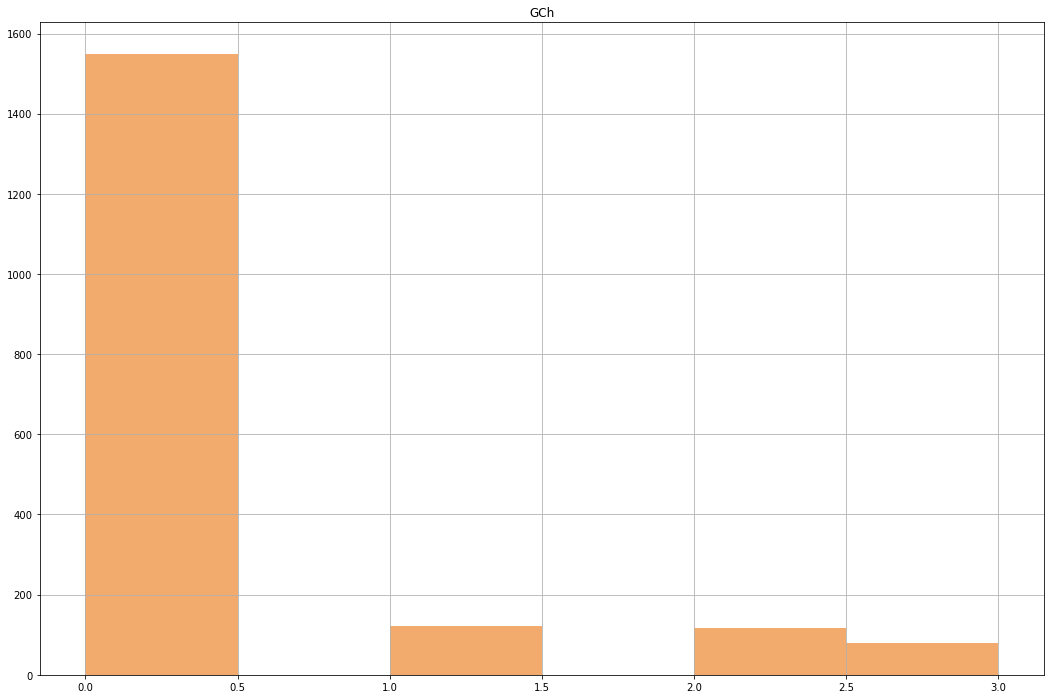

In [52]:
# Generación del histograma de GCh
df[['GCh']].hist(color='#F2AB6D', bins=6, rwidth=1,figsize=(18, 12));

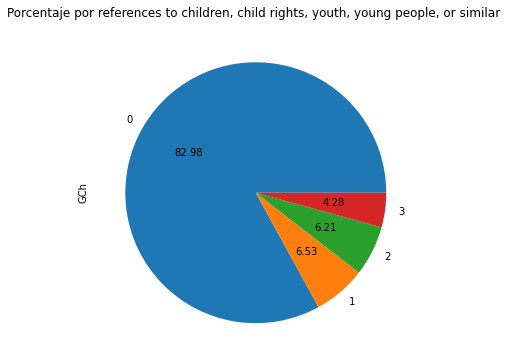

In [53]:
#Se realiza una grafica para visualizar el porcentaje de la variable
df['GCh'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6) )
plt . title ( "Porcentaje por references to children, child rights, youth, young people, or similar " ,  y = 1.02 );

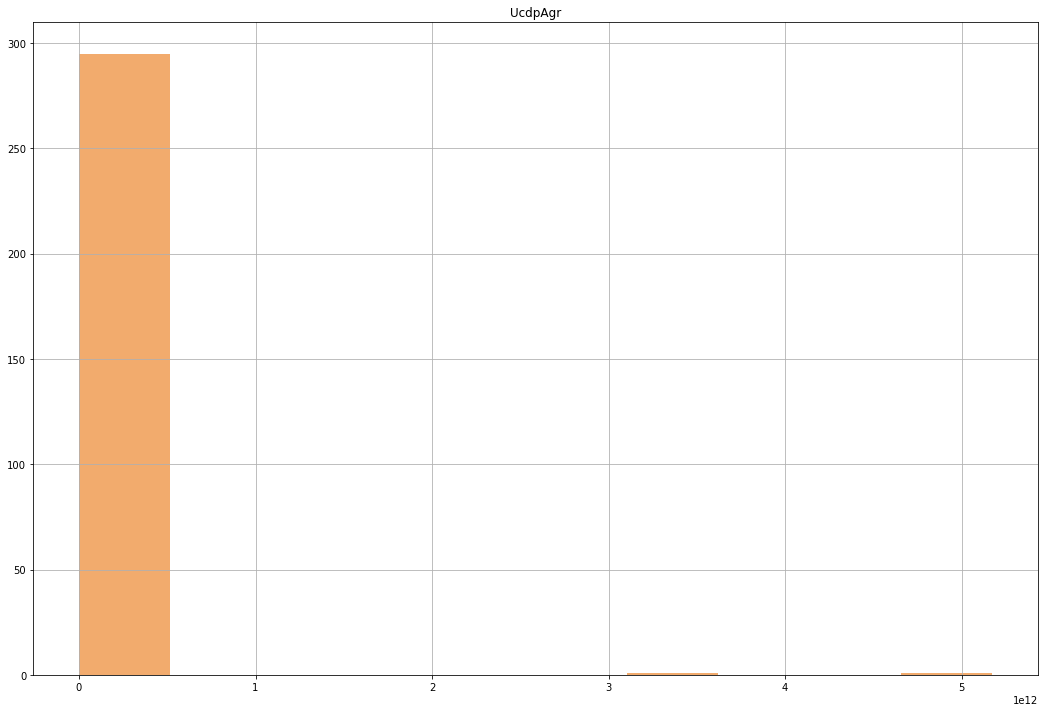

In [54]:
# Generación del histograma de UcdpAgr

df[['UcdpAgr']].hist(color='#F2AB6D', bins=10, rwidth=1,figsize=(18, 12));